In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

# Interactive lab:  Data import, calculations, and visualization


**1) Read in data into a pandas df.** \
This data contains metrics calculated for each hour, for each bee, during heat stress trial 2 of:
Jhawar, Jitesh, Jacob D. Davidson, Anja Weidenmüller, Benjamin Wild, David M. Dormagen, Tim Landgraf, Iain D. Couzin, and Michael L. Smith. 2023. “How Honeybees Respond to Heat Stress from the Individual to Colony Level.” Journal of The Royal Society Interface 20 (207): 20230290. https://doi.org/10.1098/rsif.2023.0290.


**2) Calculate average over individuals.** \
Calculate and store averages in a new variable. \
    a) Calculate an average of values in the dataframe, grouping by 'Bee unique ID'.  Note:  if you're stuck on how to calculate, you can use a loop instead.  Save as df_avg  \
    b) Calculate a weighted average of values in the dataframe, weighting by 'Num. observations'.  Save as df_avg_weighted
	
**3) Explore relationships between the metrics in the averaged data.** \
Make plot to explore the relationships between metrics, in the averaged for this day.  This is an open question, so use whatever plots you see fit.

**4) Calculate Correlation among metrics** \
Using df_avg, calculate the correlation between the per-bee averages of ['Honey', 'Brood care', 'Frame 5', 'Median speed',
       'Dispersion (avg)', 'Exit distance (median)'].  Among these metrics, what has the highest correlation?
	   
**5) Calculate Average by hour** \
Calculate average by 'Hour' instead of by Bee unique ID.  

**6) Plot metrics over the day** \
Consider the following metrics: ['Num. observations','Honey', 'Brood care', 'Frame 5', 'Median speed','Dispersion (avg)', 'Exit distance (median)']
	a) Plot the average values over the day using a line plot\
	b) Plot these metrics as a lineplot with error bars (i.e. the filled area) corresponding to the standard deviation among bees (hint: see Seaborn lineplot options).
	c) Bonus:  Instead of a line for the mean and using the standard deviation for a fill area,	plot median and quantiles: a solid line for the median, and fill betwen the upper (75%) and lower (25%) quantiles.

**7) Quantitative comparison** \ 
What quantity changed the most when comparing values over the hour 9:00-10:00 versus the hour 12:00-13:00?  Note: to compare across different metrics, need to first standardize the data, because the units are different.


# 1) Read in data into a pandas df

In [2]:
df = pd.read_csv('heatstress_trial2_hour.csv')
df.head()

,Day number,Hour,Bee unique ID,Cohort ID,Age,Num. observations,Honey,Brood care,Frame 5,Median speed,Dispersion (avg),Exit distance (median)
0,81,0.0,4132.0,15.0,54.0,652.0,0.00000,0.007669,0.000000,0.000000,45.714000,2374.021483
1,81,0.0,4302.0,15.0,54.0,274.0,0.00365,0.000912,0.197080,0.000000,700.557193,2611.922950
2,81,0.0,4377.0,16.0,47.0,609.0,0.00000,0.003284,0.917898,6.708204,688.798089,3375.645272
3,81,0.0,4392.0,16.0,47.0,1308.0,0.00000,0.000000,0.999235,4.242641,109.220504,750.320598
4,81,0.0,4474.0,16.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2) Calculate average over individuals.
Calculate and store averages in a new variable. \
    a) Calculate an average of values in the dataframe, grouping by 'Bee unique ID'.  Note:  if you're stuck on how to calculate, you can use a loop instead.  Save as df_avg  \
    b) Calculate a weighted average of values in the dataframe, weighting by 'Num. observations'.  Save as df_avg_weighted

In [3]:
# Average - weighting equally by hour
df_avg = df.groupby('Bee unique ID').mean()
df_avg

,Day number,Hour,Cohort ID,Age,Num. observations,Honey,Brood care,Frame 5,Median speed,Dispersion (avg),Exit distance (median)
Bee unique ID,,,,,,,,,,,
4132.0,81.0,11.5,15.0,54.0,1489.695652,0.007828,0.036877,0.329615,13.315324,544.393720,2322.074493
4302.0,81.0,11.5,15.0,54.0,138.250000,0.050655,0.089742,0.252464,5.475326,1014.936749,2840.498927
4377.0,81.0,11.5,16.0,47.0,2060.238095,0.134269,0.015098,0.384492,12.533556,672.408512,2943.269896
4392.0,81.0,11.5,16.0,47.0,1290.545455,0.000621,0.000234,0.904460,12.553964,231.176423,1125.995250
4474.0,81.0,11.5,16.0,47.0,1391.812500,0.001120,0.003723,0.942780,25.544207,369.441033,1089.084701
...,...,...,...,...,...,...,...,...,...,...,...
7770.0,81.0,11.5,28.0,3.0,3324.041667,0.209926,0.638008,0.001523,9.119726,296.629682,3817.889249
7771.0,81.0,11.5,28.0,3.0,3270.250000,0.236619,0.632968,0.003524,13.317004,339.478581,3997.194788
7772.0,81.0,11.5,28.0,3.0,2586.625000,0.137952,0.743091,0.005047,16.528581,239.518745,3656.310921


In [4]:
# Solution with a loop
avgs = []
for bee in df['Bee unique ID'].unique():
    dfbee = df[df['Bee unique ID']==bee]
    avgs.append(np.mean(dfbee,axis=0))
df_avg = pd.DataFrame(avgs,columns=df.columns)
df_avg = df_avg.set_index('Bee unique ID')
df_avg

,Day number,Hour,Cohort ID,Age,Num. observations,Honey,Brood care,Frame 5,Median speed,Dispersion (avg),Exit distance (median)
Bee unique ID,,,,,,,,,,,
4132.0,81.0,11.5,15.0,54.0,1489.695652,0.007828,0.036877,0.329615,13.315324,544.393720,2322.074493
4302.0,81.0,11.5,15.0,54.0,138.250000,0.050655,0.089742,0.252464,5.475326,1014.936749,2840.498927
4377.0,81.0,11.5,16.0,47.0,2060.238095,0.134269,0.015098,0.384492,12.533556,672.408512,2943.269896
4392.0,81.0,11.5,16.0,47.0,1290.545455,0.000621,0.000234,0.904460,12.553964,231.176423,1125.995250
4474.0,81.0,11.5,16.0,47.0,1391.812500,0.001120,0.003723,0.942780,25.544207,369.441033,1089.084701
...,...,...,...,...,...,...,...,...,...,...,...
7770.0,81.0,11.5,28.0,3.0,3324.041667,0.209926,0.638008,0.001523,9.119726,296.629682,3817.889249
7771.0,81.0,11.5,28.0,3.0,3270.250000,0.236619,0.632968,0.003524,13.317004,339.478581,3997.194788
7772.0,81.0,11.5,28.0,3.0,2586.625000,0.137952,0.743091,0.005047,16.528581,239.518745,3656.310921


Average - weighting by num. observations in each hour

In [5]:
# first, lets get an item of the groupby to understand how to create a function
gb = df.groupby('Bee unique ID')
dfbee = gb.get_group((list(gb.groups)[0]))
dfbee

,Day number,Hour,Bee unique ID,Cohort ID,Age,Num. observations,Honey,Brood care,Frame 5,Median speed,Dispersion (avg),Exit distance (median)
0,81,0.0,4132.0,15.0,54.0,652.0,0.000000,0.007669,0.000000,0.000000,45.714000,2374.021483
1852,81,1.0,4132.0,15.0,54.0,1357.0,0.000000,0.000553,0.000737,0.000000,21.913227,2370.616165
3704,81,2.0,4132.0,15.0,54.0,1488.0,0.000000,0.000000,0.000000,3.000000,69.400355,2332.440567
5556,81,3.0,4132.0,15.0,54.0,6767.0,0.000000,0.000000,0.014778,0.000000,26.600303,2322.036391
7408,81,4.0,4132.0,15.0,54.0,4377.0,0.000000,0.000457,0.201965,0.000000,49.144566,2345.741887
9260,81,5.0,4132.0,15.0,54.0,3363.0,0.000000,0.001412,0.000000,1.500000,48.984279,2377.952270
11112,81,6.0,4132.0,15.0,54.0,630.0,0.000000,0.106746,0.004762,12.369317,363.818311,2763.926967
12964,81,7.0,4132.0,15.0,54.0,1842.0,0.000000,0.001357,0.434311,3.000000,1054.587882,2909.302322
14816,81,8.0,4132.0,15.0,54.0,834.0,0.000000,0.000000,0.732614,3.000000,756.910391,1077.731414
16668,81,9.0,4132.0,15.0,54.0,2098.0,0.000000,0.000477,0.525739,12.369317,797.764215,1999.551299


Recall how to calculate a weighted average:
$$
\text{Weighted Average} = \frac{\sum_{i=1}^{n} w_i \cdot x_i}{\sum_{i=1}^{n} w_i}
$$
where $n$ is the total number of observations, $w_i$ is the weight for observation $i$, and $x_i$ is the 
value of the variable for observation $i$.

Now we can make a function that calculates this on the values for a single bee

In [6]:
def weightedavg(dfsingle):
    totalobs = np.sum(dfsingle['Num. observations'])
    mult = dfsingle.multiply(dfsingle['Num. observations'],axis=0)
    return mult.sum()/totalobs

To test it, can apply to the single groupby result

In [7]:
weightedavg(dfbee)

Day number                  81.000000
Hour                         8.718063
Bee unique ID             4132.000000
Cohort ID                   15.000000
Age                         54.000000
Num. observations         3119.742492
Honey                        0.000343
Brood care                   0.021875
Frame 5                      0.173219
Median speed                 5.647920
Dispersion (avg)           262.020387
Exit distance (median)    2390.414312
dtype: float64

Now use .apply() to apply it to all of the data

In [8]:
df_avg_weighted = df.groupby('Bee unique ID').apply(weightedavg)
df_avg_weighted

,Day number,Hour,Bee unique ID,Cohort ID,Age,Num. observations,Honey,Brood care,Frame 5,Median speed,Dispersion (avg),Exit distance (median)
Bee unique ID,,,,,,,,,,,,
4132.0,81.0,8.718063,4132.0,15.0,54.0,3119.742492,0.000343,0.021875,0.173219,5.647920,262.020387,2390.414312
4302.0,81.0,8.514768,4302.0,15.0,54.0,320.691380,0.048146,0.067963,0.175708,4.738213,788.738266,2797.976826
4377.0,81.0,8.181001,4377.0,16.0,47.0,4348.696152,0.385427,0.006449,0.208298,8.347014,471.633704,3708.280357
4392.0,81.0,13.923394,4392.0,16.0,47.0,2264.673077,0.000273,0.000070,0.856544,5.892853,171.035337,1240.323052
4474.0,81.0,15.518119,4474.0,16.0,47.0,2204.940815,0.000146,0.000135,0.975347,25.047362,342.770617,968.323971
...,...,...,...,...,...,...,...,...,...,...,...,...
7770.0,81.0,11.685373,7770.0,28.0,3.0,4415.168595,0.320644,0.508624,0.001792,8.658229,383.399789,4053.149707
7771.0,81.0,12.077262,7771.0,28.0,3.0,4206.366537,0.362663,0.508603,0.004689,12.676234,358.448454,4274.198331
7772.0,81.0,13.991060,7772.0,28.0,3.0,4958.133749,0.394389,0.484701,0.009504,14.830643,313.567856,4116.944215


Lets compare the averages calculated both ways

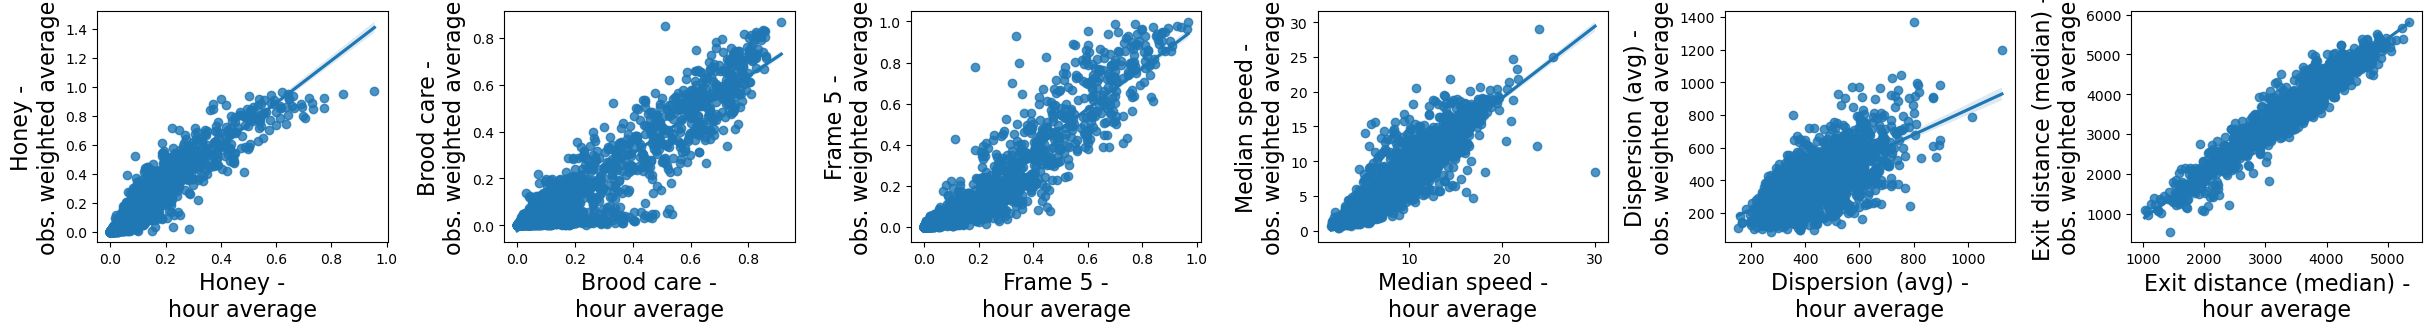

In [9]:
toplot = ['Honey', 'Brood care', 'Frame 5', 'Median speed',
       'Dispersion (avg)', 'Exit distance (median)']
f,ax = plt.subplots(1,len(toplot))
f.set_size_inches(5*len(toplot),3)
for m,a in zip(toplot,ax):
    sns.regplot(x=df_avg[m],y=df_avg_weighted[m],ax=a)
    a.set_xlabel(m+' -\nhour average',fontsize=16)
    a.set_ylabel(m+' -\nobs. weighted average',fontsize=16)
plt.subplots_adjust(wspace=0.4)

# 3) Explore relationships

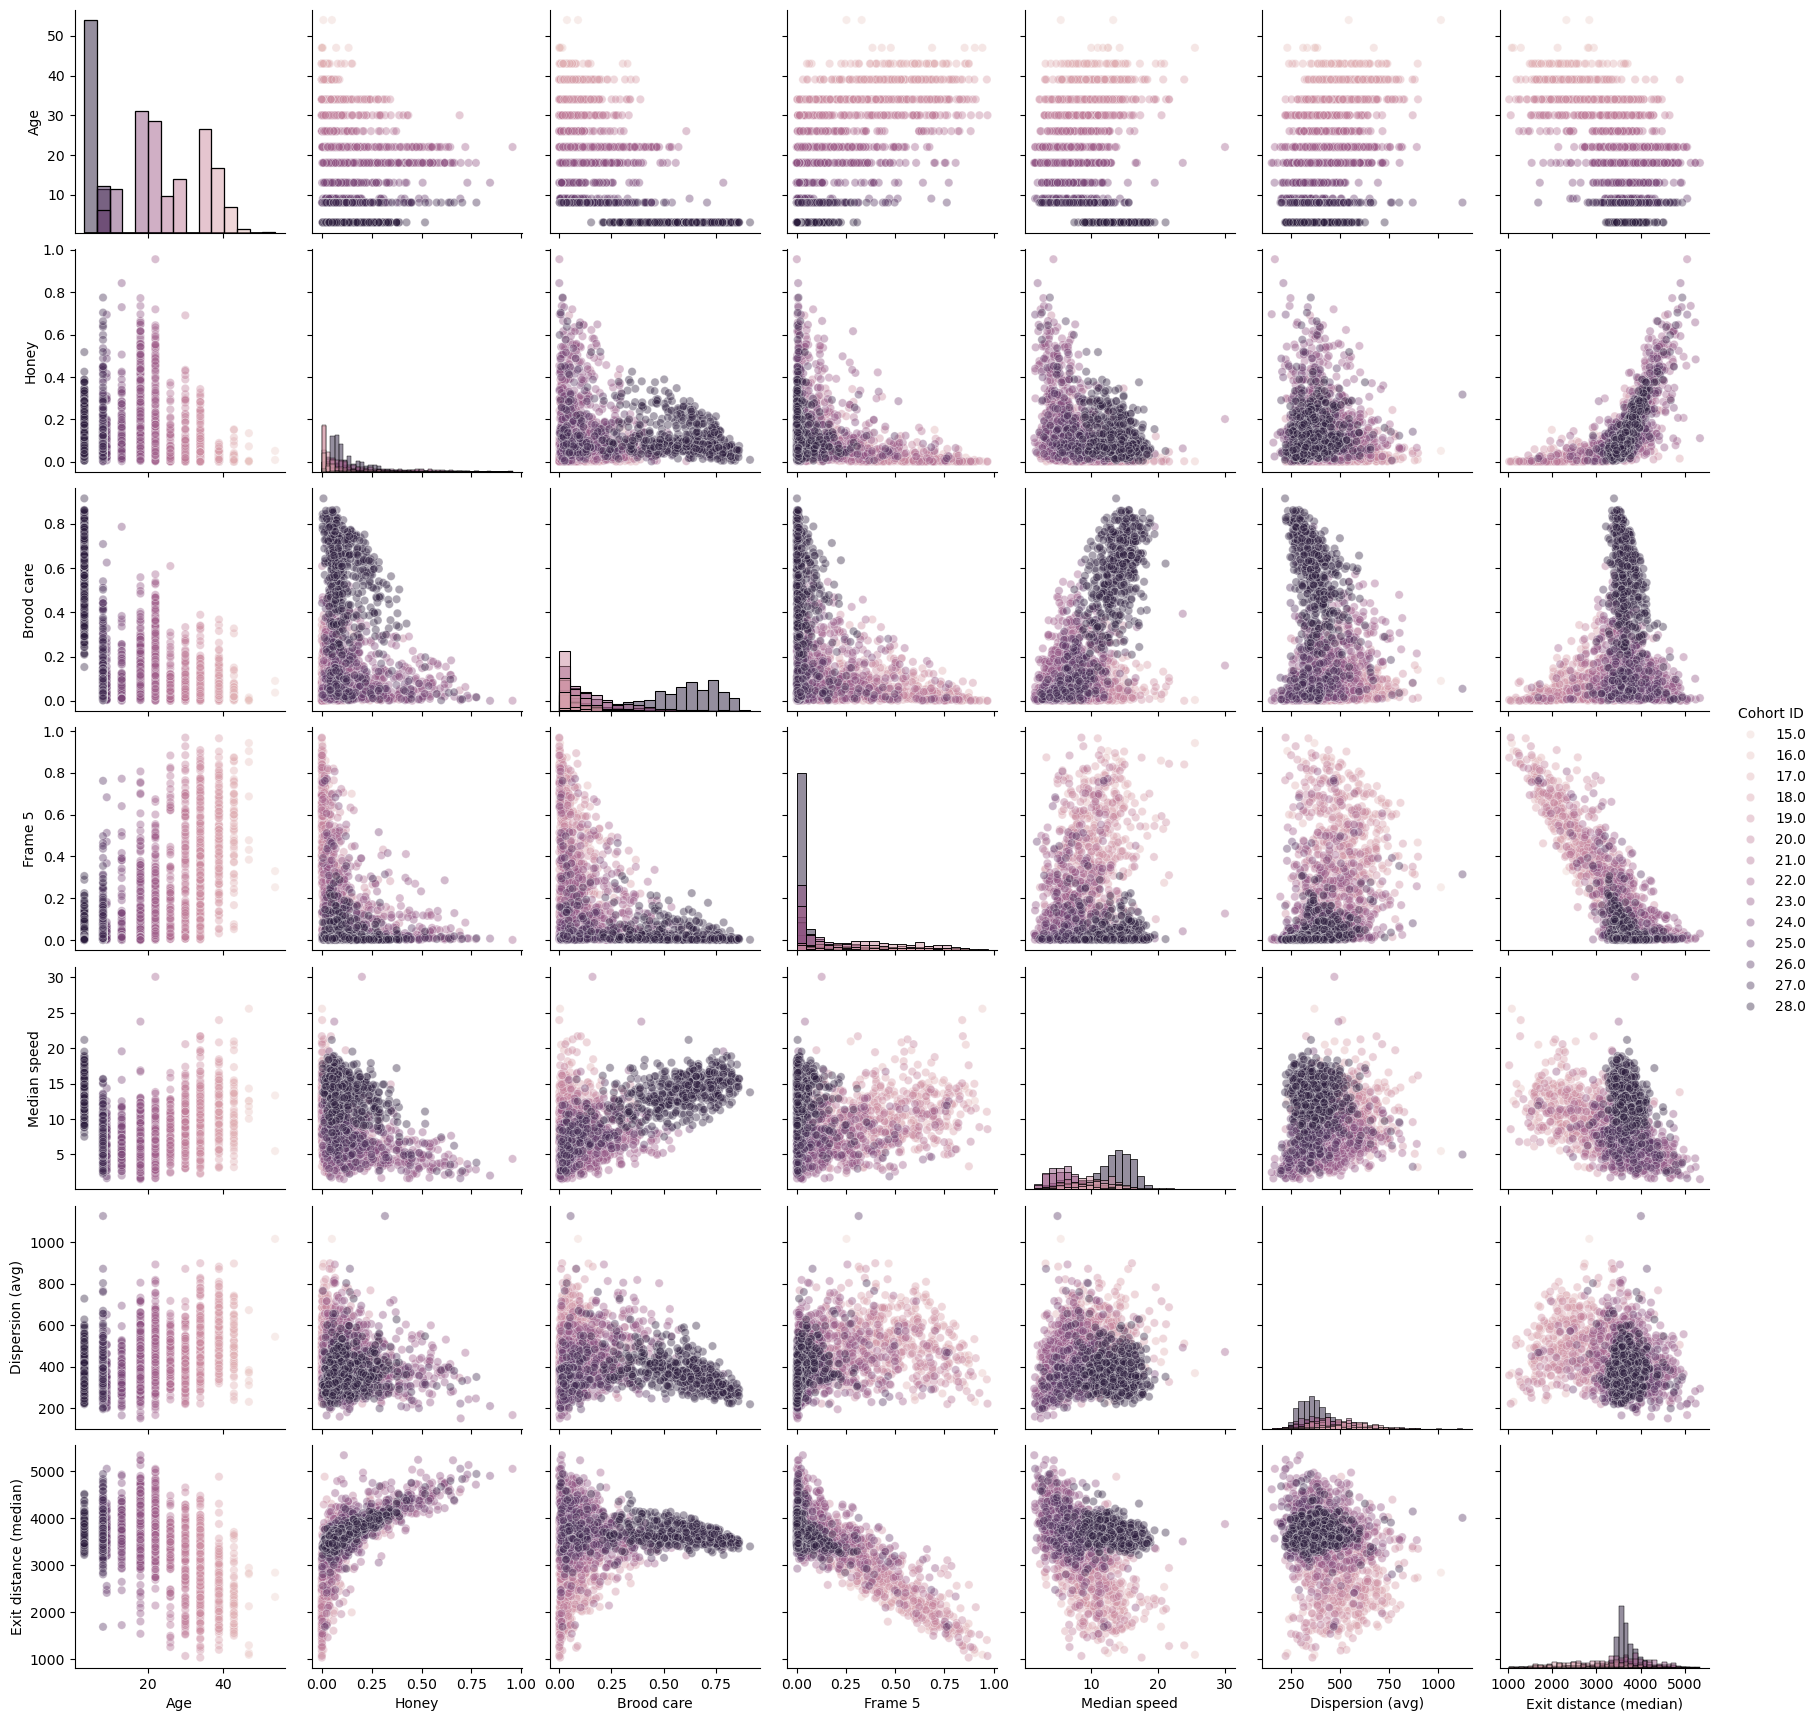

In [10]:
# There are many values to do this.  This is a very compact way to plot the relationships between these different metrics
# this uses cohort ID to set hues
metrics = ['Age','Honey','Brood care','Frame 5','Median speed','Dispersion (avg)','Exit distance (median)','Cohort ID']
g = sns.pairplot(df_avg[metrics], hue='Cohort ID', diag_kind="hist", height=2.5,kind='scatter',plot_kws={'alpha':0.4,'legend':'full'})

# 4) Calculate Correlation among metrics
Using df_avg, calculate the correlation between the per-bee averages of ['Honey', 'Brood care', 'Frame 5', 'Median speed',
       'Dispersion (avg)', 'Exit distance (median)'].  Among these metrics, what has the highest correlation?

In [11]:
metrics_for_corr = ['Num. observations','Honey', 'Brood care', 'Frame 5', 'Median speed',
       'Dispersion (avg)', 'Exit distance (median)']
correlation_matrix = df_avg[metrics_for_corr].corr()
# Set diagonal elements to NaN.  There are multiple ways one could do this
for i in range(correlation_matrix.shape[0]):
    correlation_matrix.iloc[i,i] = np.nan
correlation_matrix

,Num. observations,Honey,Brood care,Frame 5,Median speed,Dispersion (avg),Exit distance (median)
Num. observations,NaN,0.598984,-0.135713,-0.354200,-0.381401,-0.419246,0.534414
Honey,0.598984,NaN,-0.073175,-0.396193,-0.346788,-0.188640,0.666738
Brood care,-0.135713,-0.073175,NaN,-0.446113,0.567725,-0.239119,0.187599
Frame 5,-0.354200,-0.396193,-0.446113,NaN,0.106258,0.340140,-0.848246
Median speed,-0.381401,-0.346788,0.567725,0.106258,NaN,0.069302,-0.342256
Dispersion (avg),-0.419246,-0.188640,-0.239119,0.340140,0.069302,NaN,-0.287412
Exit distance (median),0.534414,0.666738,0.187599,-0.848246,-0.342256,-0.287412,NaN


In [12]:
# using 'unstack' is one way to sort the values
# this will return duplicates because its symmetric
unstacked = correlation_matrix.unstack().sort_values(ascending=False)
unstacked = unstacked[~unstacked.isna()]
unstacked

Exit distance (median)  Honey                     0.666738
Honey                   Exit distance (median)    0.666738
Num. observations       Honey                     0.598984
Honey                   Num. observations         0.598984
Brood care              Median speed              0.567725
Median speed            Brood care                0.567725
Exit distance (median)  Num. observations         0.534414
Num. observations       Exit distance (median)    0.534414
Dispersion (avg)        Frame 5                   0.340140
Frame 5                 Dispersion (avg)          0.340140
Exit distance (median)  Brood care                0.187599
Brood care              Exit distance (median)    0.187599
Median speed            Frame 5                   0.106258
Frame 5                 Median speed              0.106258
Median speed            Dispersion (avg)          0.069302
Dispersion (avg)        Median speed              0.069302
Brood care              Honey                    -0.0731

<Axes: >

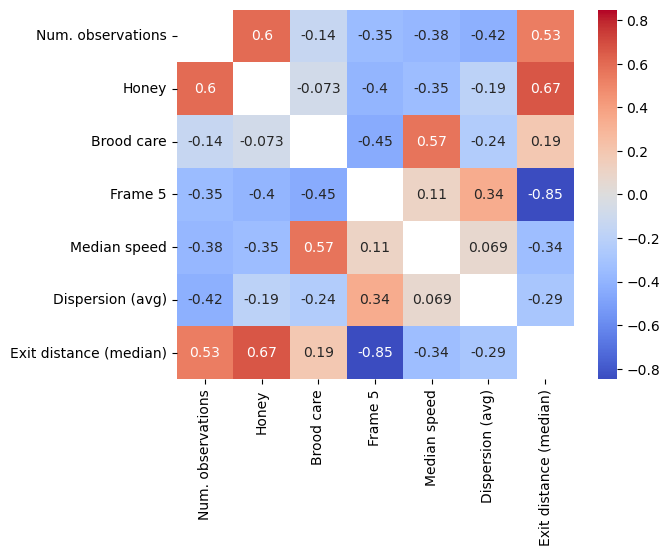

In [25]:
# visualization
v = np.max(np.abs(correlation_matrix))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',vmin=-v,vmax=v)

In [13]:
# numpy / scipy solution
metrics_for_corr = ['Num. observations','Honey', 'Brood care', 'Frame 5', 'Median speed',
       'Dispersion (avg)', 'Exit distance (median)']
corrmat = np.tile(np.nan,(len(metrics_for_corr),len(metrics_for_corr)))
for i,m1 in enumerate(metrics_for_corr):
    for j,m2 in enumerate(metrics_for_corr):
        if j>i:  # just do the upper diagonal
            x = df_avg[m1]
            y = df_avg[m2]
            # create a selector that would remove any nan values before calculating the correlation
            sel = np.logical_not(np.isnan(x)|np.isnan(y))
            corrmat[i,j] = scipy.stats.pearsonr(x,y)[0]
corrmat

array([[        nan,  0.59898444, -0.13571274, -0.3542    , -0.38140116,
        -0.41924621,  0.53441416],
       [        nan,         nan, -0.0731751 , -0.39619271, -0.3467881 ,
        -0.18864015,  0.66673785],
       [        nan,         nan,         nan, -0.44611322,  0.56772478,
        -0.23911949,  0.18759871],
       [        nan,         nan,         nan,         nan,  0.10625781,
         0.34013964, -0.84824586],
       [        nan,         nan,         nan,         nan,         nan,
         0.06930196, -0.3422563 ],
       [        nan,         nan,         nan,         nan,         nan,
                nan, -0.28741226],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan]])

In [14]:
# lets just get the maximum and the minimum.  There are multiple ways to do this
maxcorr = np.nanmax(corrmat)
mincorr = np.nanmin(corrmat)
maxinds = np.where(corrmat==maxcorr)
mininds = np.where(corrmat==mincorr)
print([metrics_for_corr[m[0]] for m in np.where(corrmat==maxcorr)],maxcorr)
print([metrics_for_corr[m[0]] for m in np.where(corrmat==mincorr)],mincorr)

['Honey', 'Exit distance (median)'] 0.6667378535523923
['Frame 5', 'Exit distance (median)'] -0.848245859971065


# 5) Calculate Average by hour

In [15]:
df_houravg = df.groupby('Hour').mean()
df_houravg

,Day number,Bee unique ID,Cohort ID,Age,Num. observations,Honey,Brood care,Frame 5,Median speed,Dispersion (avg),Exit distance (median)
Hour,,,,,,,,,,,
0.0,81.0,6551.469762,23.220302,18.74568,2822.232236,0.101168,0.272800,0.144174,7.497327,306.198558,3430.090366
1.0,81.0,6551.469762,23.220302,18.74568,2916.683691,0.106689,0.272374,0.143118,7.567097,307.417249,3444.351444
2.0,81.0,6551.469762,23.220302,18.74568,3004.012680,0.099803,0.283260,0.168883,6.642855,263.094987,3381.114594
3.0,81.0,6551.469762,23.220302,18.74568,3015.053185,0.093946,0.285069,0.163372,6.386597,251.492490,3391.515796
4.0,81.0,6551.469762,23.220302,18.74568,2840.627040,0.088574,0.281785,0.159665,6.600930,279.386453,3385.615232
5.0,81.0,6551.469762,23.220302,18.74568,2798.523331,0.092652,0.284825,0.159352,6.624155,264.739811,3379.925124
6.0,81.0,6551.469762,23.220302,18.74568,2799.125654,0.089666,0.293691,0.171240,7.177130,271.419201,3349.159228
7.0,81.0,6551.469762,23.220302,18.74568,2852.436876,0.086920,0.290875,0.150976,6.951021,256.425289,3392.904298
8.0,81.0,6551.469762,23.220302,18.74568,2854.450492,0.088670,0.288825,0.159258,6.731385,268.314163,3362.992847


In [16]:
# weighted average - using the same functions as above
df_houravg_weighted = df.groupby('Hour').apply(weightedavg)
df_houravg_weighted

,Day number,Hour,Bee unique ID,Cohort ID,Age,Num. observations,Honey,Brood care,Frame 5,Median speed,Dispersion (avg),Exit distance (median)
Hour,,,,,,,,,,,,
0.0,81.0,0.0,6635.344163,23.462424,17.652170,5476.078285,0.218497,0.180663,0.093867,5.049576,226.466484,3807.558724
1.0,81.0,1.0,6621.324492,23.410758,17.832491,5588.982993,0.226002,0.178236,0.109294,5.137786,243.119220,3772.005663
2.0,81.0,2.0,6628.119953,23.436462,17.736134,5745.795128,0.231977,0.180240,0.107539,4.029146,183.569298,3790.661199
3.0,81.0,3.0,6615.606878,23.375419,17.954611,5685.315783,0.209365,0.175187,0.116251,3.981925,173.753280,3774.209190
4.0,81.0,4.0,6598.620929,23.317344,18.171104,5549.473838,0.206207,0.179659,0.119427,4.212341,198.902013,3794.541075
5.0,81.0,5.0,6617.971332,23.414775,17.865040,5651.859242,0.221118,0.184610,0.097948,4.059159,185.335259,3836.953718
6.0,81.0,6.0,6611.072808,23.387334,17.922561,5747.907445,0.214402,0.187399,0.104271,4.001665,170.602938,3824.998420
7.0,81.0,7.0,6571.670051,23.232692,18.523021,5761.218363,0.205462,0.179743,0.099105,4.042356,159.324871,3823.303946
8.0,81.0,8.0,6582.976584,23.254088,18.394239,5780.699840,0.222983,0.184082,0.094763,3.856520,169.633099,3839.516446


Lets compare the averages calculated both ways

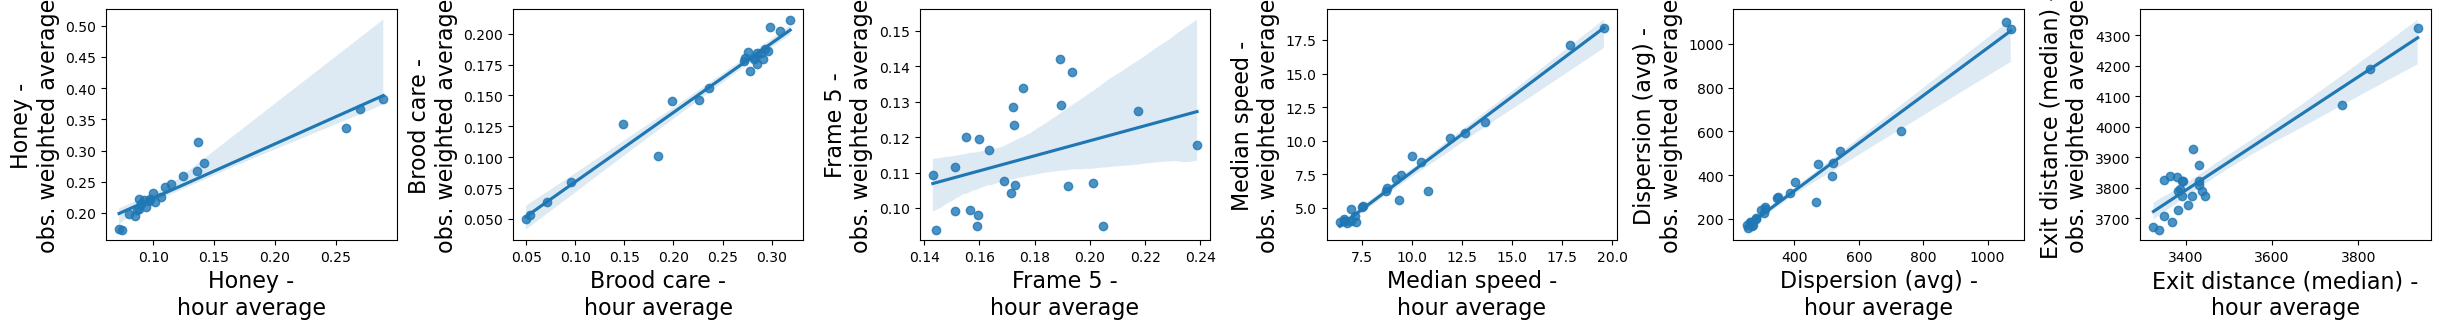

In [17]:
toplot = ['Honey', 'Brood care', 'Frame 5', 'Median speed',
       'Dispersion (avg)', 'Exit distance (median)']
f,ax = plt.subplots(1,len(toplot))
f.set_size_inches(5*len(toplot),3)
for m,a in zip(toplot,ax):
    sns.regplot(x=df_houravg[m],y=df_houravg_weighted[m],ax=a)
    a.set_xlabel(m+' -\nhour average',fontsize=16)
    a.set_ylabel(m+' -\nobs. weighted average',fontsize=16)
plt.subplots_adjust(wspace=0.4)

# 6) Plot metrics over the day

## a) Average metrics

In [18]:
df_houravg

,Day number,Bee unique ID,Cohort ID,Age,Num. observations,Honey,Brood care,Frame 5,Median speed,Dispersion (avg),Exit distance (median)
Hour,,,,,,,,,,,
0.0,81.0,6551.469762,23.220302,18.74568,2822.232236,0.101168,0.272800,0.144174,7.497327,306.198558,3430.090366
1.0,81.0,6551.469762,23.220302,18.74568,2916.683691,0.106689,0.272374,0.143118,7.567097,307.417249,3444.351444
2.0,81.0,6551.469762,23.220302,18.74568,3004.012680,0.099803,0.283260,0.168883,6.642855,263.094987,3381.114594
3.0,81.0,6551.469762,23.220302,18.74568,3015.053185,0.093946,0.285069,0.163372,6.386597,251.492490,3391.515796
4.0,81.0,6551.469762,23.220302,18.74568,2840.627040,0.088574,0.281785,0.159665,6.600930,279.386453,3385.615232
5.0,81.0,6551.469762,23.220302,18.74568,2798.523331,0.092652,0.284825,0.159352,6.624155,264.739811,3379.925124
6.0,81.0,6551.469762,23.220302,18.74568,2799.125654,0.089666,0.293691,0.171240,7.177130,271.419201,3349.159228
7.0,81.0,6551.469762,23.220302,18.74568,2852.436876,0.086920,0.290875,0.150976,6.951021,256.425289,3392.904298
8.0,81.0,6551.469762,23.220302,18.74568,2854.450492,0.088670,0.288825,0.159258,6.731385,268.314163,3362.992847


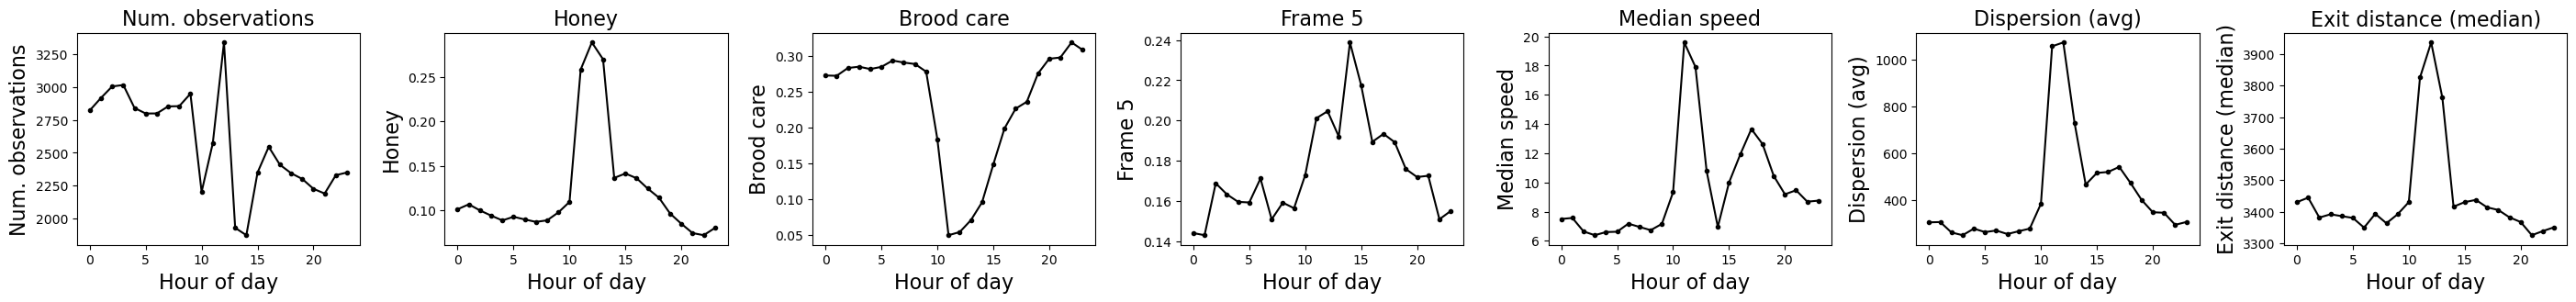

In [19]:
# use axes-level plots
toplot = ['Num. observations','Honey', 'Brood care', 'Frame 5', 'Median speed',
       'Dispersion (avg)', 'Exit distance (median)']
xvals = df_houravg.index
f,ax = plt.subplots(1,len(toplot))
f.set_size_inches(5*len(toplot),3)
for m,a in zip(toplot,ax):
    a.plot(xvals,df_houravg[m],color='k',marker='.')
    # sns.lineplot(x='Hour',y=m,data=df_houravg,ax=a)  # can also do this
    a.set_title(m,fontsize=16)
    a.set_xlabel('Hour of day',fontsize=16)
    a.set_ylabel(m,fontsize=16)

plt.subplots_adjust(wspace=0.3)

## b) Plot mean +/- standard deviation of metrics

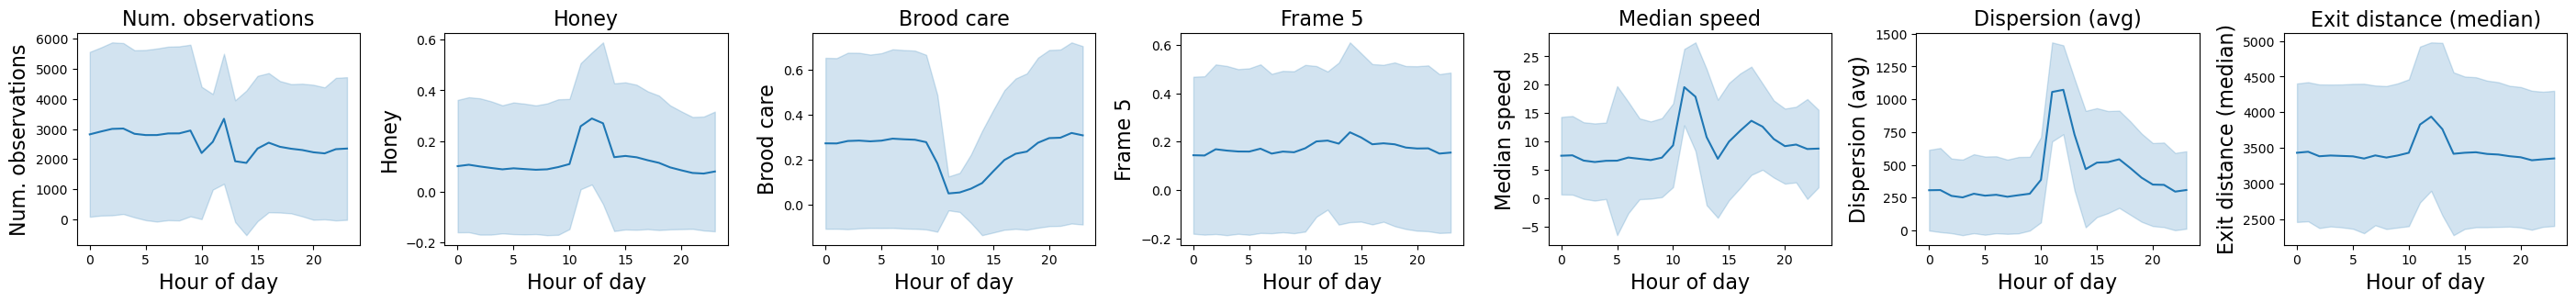

In [20]:
# note that for this, need to use the original dataframe, and NOT the average
toplot = ['Num. observations','Honey', 'Brood care', 'Frame 5', 'Median speed',
       'Dispersion (avg)', 'Exit distance (median)']
f,ax = plt.subplots(1,len(toplot))
f.set_size_inches(5*len(toplot),3)
for m,a in zip(toplot,ax):
    sns.lineplot(x='Hour',y=m,data=df,ax=a,errorbar='sd')
    a.set_title(m,fontsize=16)
    a.set_xlabel('Hour of day',fontsize=16)
    a.set_ylabel(m,fontsize=16)

plt.subplots_adjust(wspace=0.3)

## c) (bonus) Plot median and quantiles
Plot a solid line for the median and fill between the upper (75%) and lower (25%) quantiles.

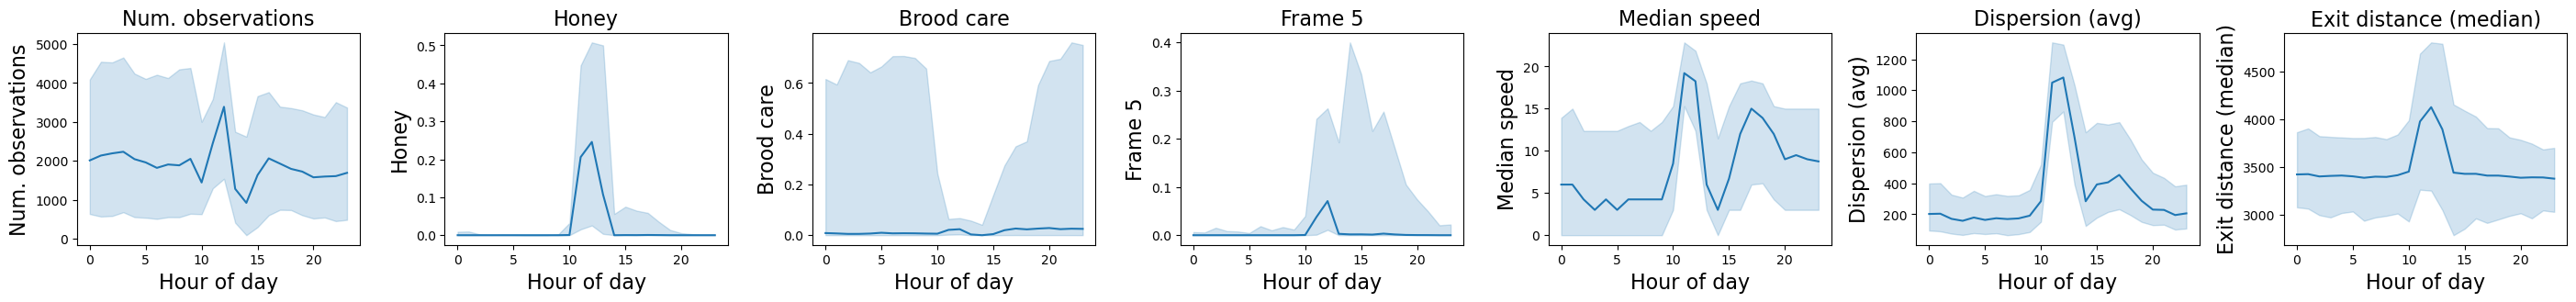

In [21]:
toplot = ['Num. observations','Honey', 'Brood care', 'Frame 5', 'Median speed',
       'Dispersion (avg)', 'Exit distance (median)']
f,ax = plt.subplots(1,len(toplot))
f.set_size_inches(5*len(toplot),3)
for m,a in zip(toplot,ax):
    sns.lineplot(x='Hour',y=m,data=df,ax=a,errorbar=(lambda x: np.quantile(x,(0.25,0.75)) ), estimator='median')
    a.set_title(m,fontsize=16)
    a.set_xlabel('Hour of day',fontsize=16)
    a.set_ylabel(m,fontsize=16)
plt.subplots_adjust(wspace=0.3)

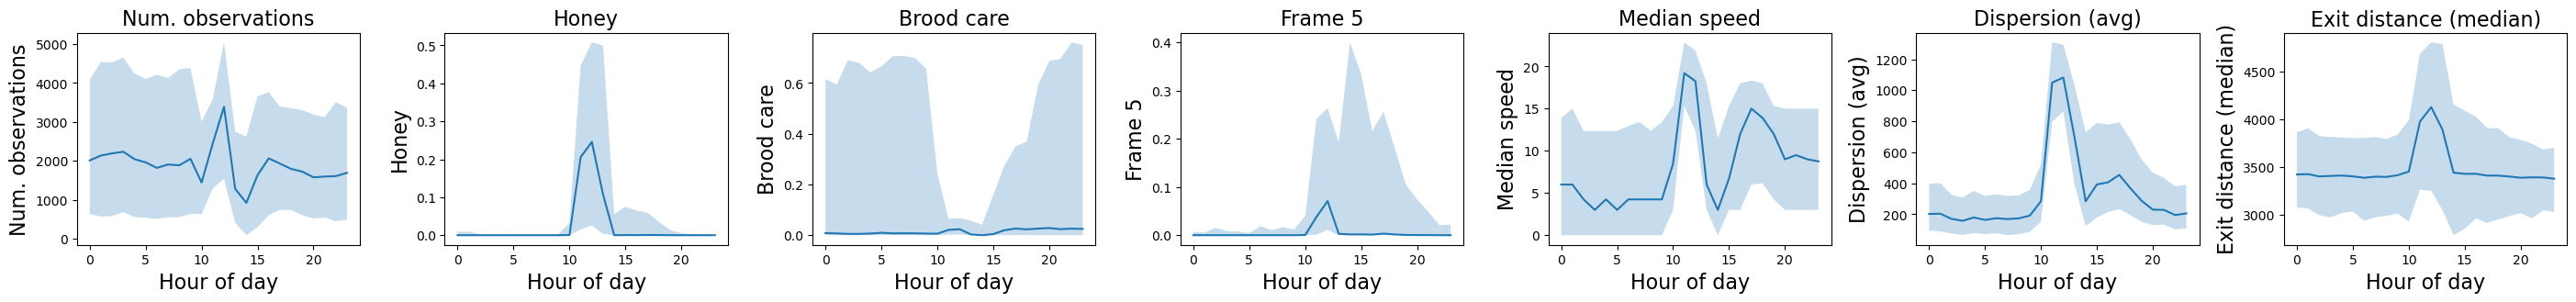

In [22]:
# here's another way to do this, calculating it separately, and using only matplotlib
toplot = ['Num. observations','Honey', 'Brood care', 'Frame 5', 'Median speed',
       'Dispersion (avg)', 'Exit distance (median)']
f,ax = plt.subplots(1,len(toplot))
f.set_size_inches(5*len(toplot),3)
for m,a in zip(toplot,ax):
    dfsel = df[['Hour',m]]
    median_per_hour = dfsel.groupby('Hour').median()    
    a.plot(median_per_hour.index,median_per_hour[m])
    quantile_per_hour = dfsel.groupby('Hour').apply(lambda x: np.nanquantile(x[m],(0.25,0.75)))
    fill_values = np.vstack(quantile_per_hour.values)
    a.fill_between(quantile_per_hour.index,fill_values[:,0],fill_values[:,1],alpha=0.25)
    a.set_title(m,fontsize=16)
    a.set_xlabel('Hour of day',fontsize=16)
    a.set_ylabel(m,fontsize=16)
plt.subplots_adjust(wspace=0.3)

# 7) Quantitative comparison
What quantity changed the most when comparing values over the hour 9:00-10:00 versus the hour 12:00-13:00?  Note: to compare across different metrics, need to first standardize the data, because the units are different.

In [23]:
compare_metrics = ['Num. observations', 'Honey', 'Brood care', 'Frame 5', 'Median speed',
                         'Dispersion (avg)', 'Exit distance (median)']
# Select relevant columns and create a copy of the dataframe
dfnorm = df[compare_metrics].copy()
dfnorm = (dfnorm - dfnorm.mean())/dfnorm.std()
# add the 'Hour' column again, so that can use it
dfnorm['Hour'] = df['Hour']

time1 = dfnorm[dfnorm['Hour']==9]
time2 = dfnorm[dfnorm['Hour']==12]
time2[compare_metrics].mean() - time1[compare_metrics].mean()

Num. observations         0.155087
Honey                     0.714618
Brood care               -0.628188
Frame 5                   0.143352
Median speed              1.181792
Dispersion (avg)          1.957989
Exit distance (median)    0.526895
dtype: float64